# Handling Unbalanced Data - SMOTE

What is SMOTE?

* SMOTE is like creating "synthetic" (fake but realistic) customers who would buy our premium shoes.
* Instead of just copying existing premium shoe buyer records (like in random oversampling), we create new, slightly different records that are similar to the existing ones.
* This helps our model learn the patterns of premium shoe buyers without just duplicating the same information.

How it Works (Simplified):

Find the Minority Class:

* We find the class with fewer samples (premium shoe buyers).

Choose a Sample:

* We randomly pick a customer who bought premium shoes.

Find the Nearest Neighbors:

* We find the "nearest neighbors" of that customer – other customers who bought premium shoes and are similar in terms of features like purchase history, demographics, etc.

Create a Synthetic Sample:

* We create a new, synthetic customer record by "connecting the dots" between the chosen customer and their nearest neighbors.
* We essentially create a new customer who is somewhere in between the chosen customer and their neighbors.

Add the Synthetic Sample:

* We add this new synthetic customer record to our dataset.

Repeat:

* We repeat this process until we have enough synthetic premium shoe buyer records to balance our data.

# 1. Import necessary dependencies

In [61]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 2. Create sample Dataset

In [62]:
# Sample DataFrame with unbalanced data (simulating limited edition purchases)

data = pd.DataFrame({
    'CustomerID': range(100),
    'Regular_Purchase': [1] * 95 + [0] * 5,  # 1 for regular, 0 for limited edition
    'Purchase_Amount': np.random.randint(50, 200, 100),  # Random purchase amounts
    'Customer_Age': np.random.randint(18, 65, 100)
})

print("Original Data :\n")
data

Original Data :



,CustomerID,Regular_Purchase,Purchase_Amount,Customer_Age
0,0,1,118,30
1,1,1,109,42
2,2,1,110,24
3,3,1,101,41
4,4,1,123,21
...,...,...,...,...
95,95,0,70,55
96,96,0,125,55
97,97,0,105,54
98,98,0,74,60


In [63]:
print("Original Data (Unbalanced):\n")
data['Regular_Purchase'].value_counts()

Original Data (Unbalanced):



,count
Regular_Purchase,
1,95
0,5


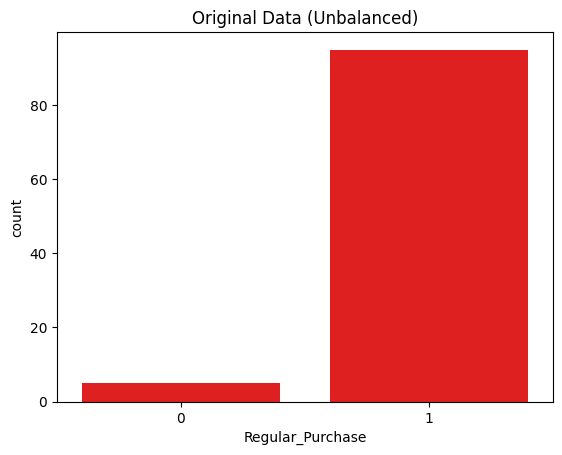

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Regular_Purchase', data=data , color='Red')
plt.title('Original Data (Unbalanced)')
plt.show()

# 3. Separate features and target

In [65]:
# Separate features and target

X = data[['Purchase_Amount', 'Customer_Age']]
y = data['Regular_Purchase']

In [66]:
X.head()

,Purchase_Amount,Customer_Age
0,118,30
1,109,42
2,110,24
3,101,41
4,123,21


In [67]:
y.head()

,Regular_Purchase
0,1
1,1
2,1
3,1
4,1


In [68]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

# 4. Apply SMOTE to the training data

In [71]:
# Apply SMOTE to the training data

smote = SMOTE(random_state=42, k_neighbors=min(5, y_train.value_counts().min() - 1) ) # Setting k_neighbors to minimum
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nData after SMOTE Oversampling:\n")
pd.Series(y_train_smote).value_counts()


Data after SMOTE Oversampling:



,count
Regular_Purchase,
1,75
0,75


In [75]:
SMOTE_df = pd.concat([pd.DataFrame(X_train_smote), pd.DataFrame(y_train_smote)], axis=1)
SMOTE_df

,Purchase_Amount,Customer_Age,Regular_Purchase
0,55,48,1
1,146,43,1
2,138,55,1
3,66,32,1
4,94,29,1
...,...,...,...
145,94,56,0
146,104,57,0
147,118,55,0
148,115,54,0


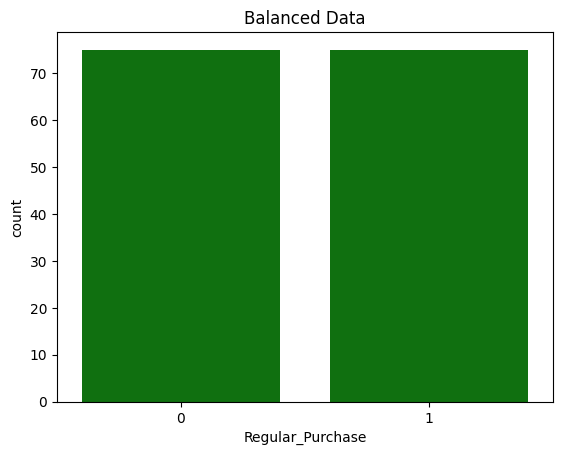

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Regular_Purchase', data=SMOTE_df , color='Green')
plt.title('Balanced Data')
plt.show()

# **Note

Key Points:

SMOTE():

* This class from the imblearn library is used for SMOTE oversampling.

fit_resample():

* This method applies SMOTE to the data and returns the oversampled features and target.

Training Data Only:

* It's essential to apply SMOTE only to the training data to avoid data leakage.

Data Splitting:

* Split the data into training and testing sets before applying SMOTE.

Feature Selection/Engineering:

* SMOTE works best with meaningful features. If your features are not informative, SMOTE might not be effective.

Hyperparameter Tuning:

* SMOTE has hyperparameters that can be tuned, such as k_neighbors, which controls the number of nearest neighbors used to create synthetic samples.

Installation:

* If you don't have imblearn installed, you can install it using pip install imbalanced-learn.

Model Comparison:

* Always compare the performance of your model on the SMOTE-oversampled data to its performance on the original, unbalanced data.